In [1]:
from PIL import Image
import requests
import torch
from transformers import CLIPProcessor, CLIPModel, CLIPImageProcessor, CLIPVisionModelWithProjection
model = CLIPVisionModelWithProjection.from_pretrained("openai/clip-vit-base-patch16",device_map="cuda")
processor = CLIPImageProcessor.from_pretrained("openai/clip-vit-base-patch16",device_map="cuda")
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True).to("cuda")
outputs = model(**inputs)
# logits_per_image = outputs.logits_per_image # this is the image-text similarity score
# probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities


c:\Users\shanm\miniconda3\envs\billing\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Unused or unrecognized kwargs: padding, text.


In [2]:
# build index

import os

path_to_images = "./dataset/index/"

images = os.listdir(path_to_images)
encodings = []

for image in images:
    image = Image.open(path_to_images + image)
    inputs = processor(images=image, return_tensors="pt", padding=True).to("cuda")
    with torch.no_grad():
        features = model(**inputs)
    encodings.append(features)

Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


In [3]:
query_images = os.listdir("./dataset/queries/")
query_encodings = []
for image in query_images:
    image = Image.open("./dataset/queries/" + image)
    inputs = processor(images=image, return_tensors="pt", padding=True).to("cuda")
    with torch.no_grad():
        features = model(**inputs)
    query_encodings.append(features)


    

Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Query image 0:


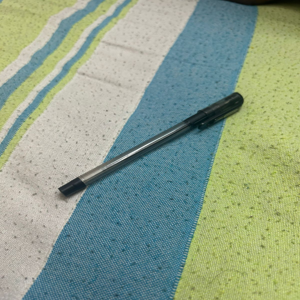

Closest image:


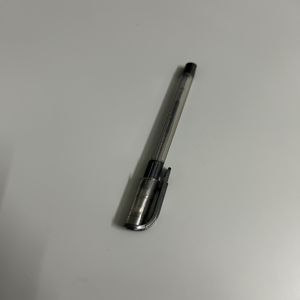

[[0.90158546]]
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
Query image 1:


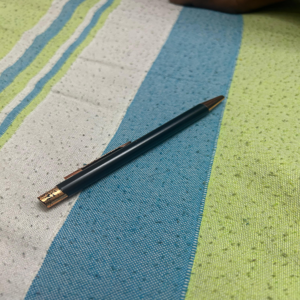

Closest image:


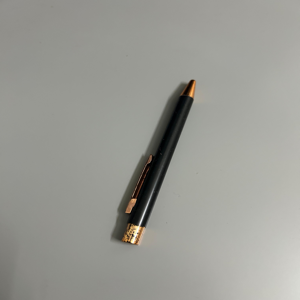

[[0.92467266]]
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
Query image 2:


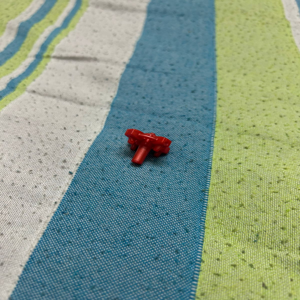

Closest image:


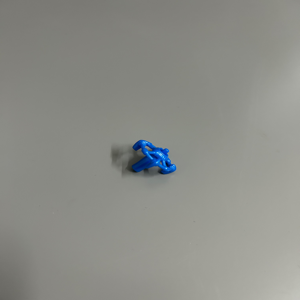

[[0.83089954]]
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
Query image 3:


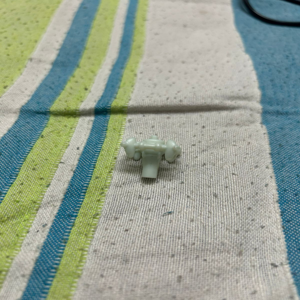

Closest image:


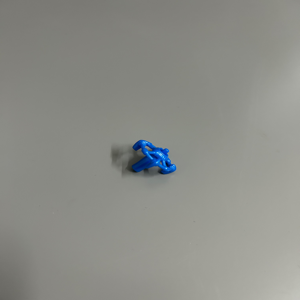

[[0.804614]]
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------


In [9]:
# find the closest images in the index for each query image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display

for idx, query_encoding in enumerate(query_encodings):
    similarities = []
    for encoding in encodings:
        similarity = cosine_similarity(query_encoding.image_embeds.cpu(), encoding.image_embeds.cpu())
        similarities.append(similarity)
    closest = np.argmax(similarities)
    print(f"Query image {idx}:")
    query_image = Image.open("./dataset/queries/" + query_images[idx]).resize((300, 300))
    display(query_image)
    print("Closest image:")
    closest_image = Image.open(path_to_images + images[closest]).resize((300, 300))
    display(closest_image)
    print(similarities[closest])
    print("---------------------------------------------------------------------------------------------------")
    print("---------------------------------------------------------------------------------------------------")